In [21]:
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [28]:
data_transform = transforms.Compose([
        transforms.Resize((300,300)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [29]:
face_dataset = datasets.ImageFolder(root='../aligned-data',
                                           transform=data_transform)
dataset_loader = torch.utils.data.DataLoader(face_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

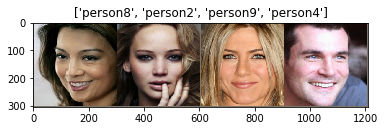

In [33]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

inputs, classes = next(iter(dataset_loader))
class_names = face_dataset.classes
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])